In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Project/health_fitness_dataset_P.csv")

In [ ]:
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,hydration_level,Season,Intensity,hours_sleep,Mood
0,0,male,36,189.0,82,26,101.0,41.0,150,6.72,Winter,Medium,8.6,Calm
1,1,female,64,163.0,60,8,85.0,39.7,34,5.86,Autumn,High,6.5,Sad
2,2,female,51,161.0,64,7,84.0,39.8,29,0.76,Winter,Medium,8.0,Calm
3,3,male,20,192.0,90,25,105.0,40.7,140,7.81,Spring,Low,6.9,Angry
4,4,female,38,166.0,61,25,102.0,40.6,146,5.92,Autumn,High,7.1,Happy


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               750000 non-null  int64  
 1   Sex              750000 non-null  object 
 2   Age              750000 non-null  int64  
 3   Height           750000 non-null  float64
 4   Weight           750000 non-null  int64  
 5   Duration         750000 non-null  int64  
 6   Heart_Rate       750000 non-null  float64
 7   Body_Temp        750000 non-null  float64
 8   Calories         750000 non-null  int64  
 9   hydration_level  750000 non-null  float64
 10  Season           750000 non-null  object 
 11  Intensity        750000 non-null  object 
 12  hours_sleep      740000 non-null  float64
 13  Mood             750000 non-null  object 
dtypes: float64(5), int64(5), object(4)
memory usage: 80.1+ MB


In [ ]:
df.isnull().sum()

,0
Sex,0
Age,0
Height,0
Weight,0
Duration,0
Heart_Rate,0
Body_Temp,0
Calories,0
hydration_level,0
Intensity,0


In [ ]:
df.shape

(750000, 15)

In [ ]:
df.dropna(inplace=True)
display(df.head())

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,hydration_level,Season,Intensity,hours_sleep,Mood,BMI
0,0,male,36,189.0,82,26,101.0,41.0,150,6.72,Winter,Medium,8.6,Calm,22.955684
1,1,female,64,163.0,60,8,85.0,39.7,34,5.86,Autumn,High,6.5,Sad,22.582709
2,2,female,51,161.0,64,7,84.0,39.8,29,0.76,Winter,Medium,8.0,Calm,24.690405
3,3,male,20,192.0,90,25,105.0,40.7,140,7.81,Spring,Low,6.9,Angry,24.414062
4,4,female,38,166.0,61,25,102.0,40.6,146,5.92,Autumn,High,7.1,Happy,22.136740


In [ ]:
df.shape

(740000, 15)

In [ ]:
df.drop(['id','Season','Mood'],axis=1,inplace=True)

In [ ]:
df.shape

(740000, 12)

In [ ]:
df_ohe=pd.get_dummies(df)
df_ohe.shape

(740000, 15)

In [ ]:
df_ohe.head()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,hydration_level,hours_sleep,BMI,Sex_female,Sex_male,Intensity_High,Intensity_Low,Intensity_Medium
0,36,189.0,82,26,101.0,41.0,150,6.72,8.6,22.955684,False,True,False,False,True
1,64,163.0,60,8,85.0,39.7,34,5.86,6.5,22.582709,True,False,True,False,False
2,51,161.0,64,7,84.0,39.8,29,0.76,8.0,24.690405,True,False,False,False,True
3,20,192.0,90,25,105.0,40.7,140,7.81,6.9,24.414062,False,True,False,True,False
4,38,166.0,61,25,102.0,40.6,146,5.92,7.1,22.136740,True,False,True,False,False


In [ ]:
X=df_ohe.drop(['Calories'],axis=1)
y=df['Calories']

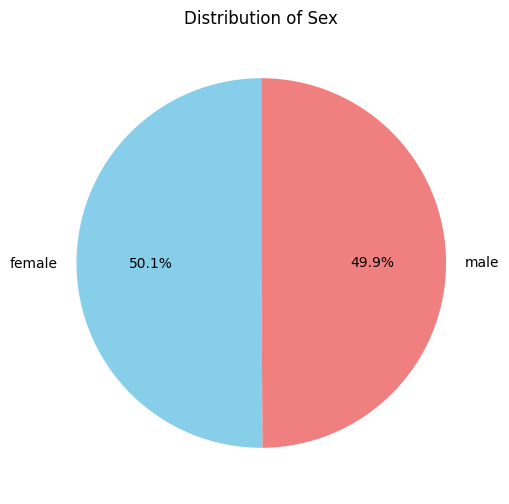

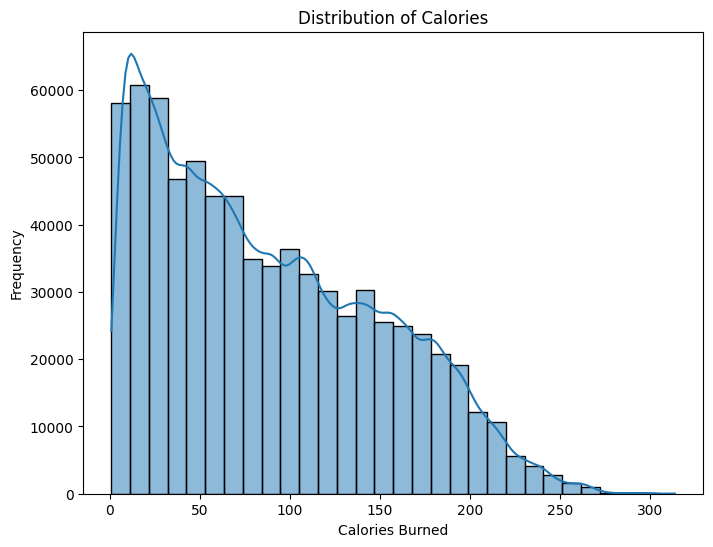

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pie chart for Sex
plt.figure(figsize=(6, 6))
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Sex')
plt.ylabel('') # Remove the default 'Sex' label on the y-axis
plt.show()

# Histogram for Calories
plt.figure(figsize=(8, 6))
sns.histplot(df['Calories'], kde=True, bins=30)
plt.title('Distribution of Calories')
plt.xlabel('Calories Burned')
plt.ylabel('Frequency')
plt.show()

In [ ]:
X.shape,y.shape

((740000, 14), (740000,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=7)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((592000, 14), (148000, 14), (592000,), (148000,))

In [ ]:
# prompt: X_train and Xtest make them standardize by standard scelar

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Fit on training data
scaler.fit(X_train)

# Transform training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.22458852, -1.53530277, -1.15397149, ...,  1.41474764,
        -0.70663294, -0.70784776],
       [-1.01710083,  0.02442568,  0.56248089, ...,  1.41474764,
        -0.70663294, -0.70784776],
       [-0.75337268,  0.49234421,  0.63399974, ...,  1.41474764,
        -0.70663294, -0.70784776],
       ...,
       [ 1.94984096,  0.1024121 ,  0.13336779, ..., -0.70683984,
         1.41516188, -0.70784776],
       [-0.68744064, -1.14537066, -0.93941494, ..., -0.70683984,
        -0.70663294,  1.41273316],
       [-1.21489695, -0.98939782, -0.2957453 , ...,  1.41474764,
        -0.70663294, -0.70784776]])

In [ ]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Build and train the linear regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr.predict(X_test_scaled)

# Calculate metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R-squared score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

R-squared score: 0.9693
Mean Squared Error: 119.1314
Root Mean Squared Error: 10.9147


In [ ]:
import lightgbm as lgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Build and train the LightGBM model
lgbm = lgb.LGBMRegressor(random_state=7)
lgbm.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lgbm = lgbm.predict(X_test_scaled)

# Calculate metrics
r2_lgbm = r2_score(y_test, y_pred_lgbm)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
rmse_lgbm = np.sqrt(mse_lgbm)

print(f"LightGBM R-squared score: {r2_lgbm:.4f}")
print(f"LightGBM Mean Squared Error: {mse_lgbm:.4f}")
print(f"LightGBM Root Mean Squared Error: {rmse_lgbm:.4f}")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026108 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 942
[LightGBM] [Info] Number of data points in the train set: 592000, number of used features: 14
[LightGBM] [Info] Start training from score 88.285076


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


LightGBM R-squared score: 0.9961
LightGBM Mean Squared Error: 15.0787
LightGBM Root Mean Squared Error: 3.8831


In [ ]:
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Build and train the XGBoost Regressor model
xgbr = xgb.XGBRegressor(random_state=7)
xgbr.fit(X_train_scaled, y_train)

# Make predictions
y_pred_xgbr = xgbr.predict(X_test_scaled)

# Calculate metrics
r2_xgbr = r2_score(y_test, y_pred_xgbr)
mse_xgbr = mean_squared_error(y_test, y_pred_xgbr)
rmse_xgbr = np.sqrt(mse_xgbr)

print(f"XGBoost R-squared score: {r2_xgbr:.4f}")
print(f"XGBoost Mean Squared Error: {mse_xgbr:.4f}")
print(f"XGBoost Root Mean Squared Error: {rmse_xgbr:.4f}")

XGBoost R-squared score: 0.9962
XGBoost Mean Squared Error: 14.7435
XGBoost Root Mean Squared Error: 3.8397


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Build and train the Lasso Regression model
lasso = Lasso(alpha=1.0, random_state=7) # You can tune the alpha parameter
lasso.fit(X_train_scaled, y_train)

# Make predictions
y_pred_lasso = lasso.predict(X_test_scaled)

# Calculate metrics
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)

print(f"Lasso Regression R-squared score: {r2_lasso:.4f}")
print(f"Lasso Regression Mean Squared Error: {mse_lasso:.4f}")
print(f"Lasso Regression Root Mean Squared Error: {rmse_lasso:.4f}")

Lasso Regression R-squared score: 0.9624
Lasso Regression Mean Squared Error: 145.8796
Lasso Regression Root Mean Squared Error: 12.0781


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Build and train the Ridge Regression model
ridge = Ridge(alpha=1.0, random_state=7) # You can tune the alpha parameter
ridge.fit(X_train_scaled, y_train)

# Make predictions
y_pred_ridge = ridge.predict(X_test_scaled)

# Calculate metrics
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)

print(f"Ridge Regression R-squared score: {r2_ridge:.4f}")
print(f"Ridge Regression Mean Squared Error: {mse_ridge:.4f}")
print(f"Ridge Regression Root Mean Squared Error: {rmse_ridge:.4f}")

Ridge Regression R-squared score: 0.9693
Ridge Regression Mean Squared Error: 119.1313
Ridge Regression Root Mean Squared Error: 10.9147


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Build and train the Random Forest Regressor model
rf = RandomForestRegressor(n_estimators=100, random_state=7) # You can tune n_estimators
rf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_rf = rf.predict(X_test_scaled)

# Calculate metrics
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest Regressor R-squared score: {r2_rf:.4f}")
print(f"Random Forest Regressor Mean Squared Error: {mse_rf:.4f}")
print(f"Random Forest Regressor Root Mean Squared Error: {rmse_rf:.4f}")

Random Forest Regressor R-squared score: 0.9962
Random Forest Regressor Mean Squared Error: 14.8608
Random Forest Regressor Root Mean Squared Error: 3.8550


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Build and train the Decision Tree Regressor model
dt = DecisionTreeRegressor(random_state=7)
dt.fit(X_train_scaled, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test_scaled)

# Calculate metrics
r2_dt = r2_score(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)

print(f"Decision Tree Regressor R-squared score: {r2_dt:.4f}")
print(f"Decision Tree Regressor Mean Squared Error: {mse_dt:.4f}")
print(f"Decision Tree Regressor Root Mean Squared Error: {rmse_dt:.4f}")

Decision Tree Regressor R-squared score: 0.9928
Decision Tree Regressor Mean Squared Error: 27.8852
Decision Tree Regressor Root Mean Squared Error: 5.2806


In [ ]:
print("--- Linear Regression Parameters ---")
print(lr.get_params())
print("\n--- Lasso Regression Parameters ---")
print(lasso.get_params())
print("\n--- Ridge Regression Parameters ---")
print(ridge.get_params())
print("\n--- Random Forest Regressor Parameters ---")
print(rf.get_params())
print("\n--- Decision Tree Regressor Parameters ---")
print(dt.get_params())

--- Linear Regression Parameters ---
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

--- Lasso Regression Parameters ---
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': 1000, 'positive': False, 'precompute': False, 'random_state': 7, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False}

--- Ridge Regression Parameters ---
{'alpha': 1.0, 'copy_X': True, 'fit_intercept': True, 'max_iter': None, 'positive': False, 'random_state': 7, 'solver': 'auto', 'tol': 0.0001}

--- Random Forest Regressor Parameters ---
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 7, 'verbose': 0, 'warm_start': False}

--- Decision Tree Regressor Parameters 

In [ ]:
print("--- Parameters Used in Models ---")

# Linear Regression
print("\nLinear Regression:")
print("- No specific parameters were explicitly set during initialization. Default parameters were used.")

# Lasso Regression
print("\nLasso Regression:")
print(f"- alpha: {lasso.alpha}")
print(f"- random_state: {lasso.random_state}")

# Ridge Regression
print("\nRidge Regression:")
print(f"- alpha: {ridge.alpha}")
print(f"- random_state: {ridge.random_state}")

# Random Forest Regressor
print("\nRandom Forest Regressor:")
print(f"- n_estimators: {rf.n_estimators}")
print(f"- random_state: {rf.random_state}")

# Decision Tree Regressor
print("\nDecision Tree Regressor:")
print(f"- random_state: {dt.random_state}")

# K-Nearest Neighbors Regressor
print("\nK-Nearest Neighbors Regressor:")
print(f"- n_neighbors: {knn.n_neighbors}")

--- Parameters Used in Models ---

Linear Regression:
- No specific parameters were explicitly set during initialization. Default parameters were used.

Lasso Regression:
- alpha: 1.0
- random_state: 7

Ridge Regression:
- alpha: 1.0
- random_state: 7

Random Forest Regressor:
- n_estimators: 100
- random_state: 7

Decision Tree Regressor:
- random_state: 7

K-Nearest Neighbors Regressor:
- n_neighbors: 5


In [ ]:
# Calculate R-squared on the training set for each model

# Linear Regression
r2_train_lr = r2_score(y_train, lr.predict(X_train_scaled))
print(f"Linear Regression R-squared (Training): {r2_train_lr:.4f}")

# Lasso Regression
r2_train_lasso = r2_score(y_train, lasso.predict(X_train_scaled))
print(f"Lasso Regression R-squared (Training): {r2_train_lasso:.4f}")

# Ridge Regression
r2_train_ridge = r2_score(y_train, ridge.predict(X_train_scaled))
print(f"Ridge Regression R-squared (Training): {r2_train_ridge:.4f}")

# Random Forest Regressor
r2_train_rf = r2_score(y_train, rf.predict(X_train_scaled))
print(f"Random Forest Regressor R-squared (Training): {r2_train_rf:.4f}")

# Decision Tree Regressor
r2_train_dt = r2_score(y_train, dt.predict(X_train_scaled))
print(f"Decision Tree Regressor R-squared (Training): {r2_train_dt:.4f}")

Linear Regression R-squared (Training): 0.9695
Lasso Regression R-squared (Training): 0.9624
Ridge Regression R-squared (Training): 0.9695
Random Forest Regressor R-squared (Training): 0.9995
Decision Tree Regressor R-squared (Training): 1.0000


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Build and train the K-Nearest Neighbors Regressor model
knn = KNeighborsRegressor(n_neighbors=5) # You can tune n_neighbors
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)

# Calculate metrics
r2_knn = r2_score(y_test, y_pred_knn)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f"K-Nearest Neighbors Regressor R-squared score: {r2_knn:.4f}")
print(f"K-Nearest Neighbors Regressor Mean Squared Error: {mse_knn:.4f}")
print(f"K-Nearest Neighbors Regressor Root Mean Squared Error: {rmse_knn:.4f}")

K-Nearest Neighbors Regressor R-squared score: 0.9867
K-Nearest Neighbors Regressor Mean Squared Error: 51.7598
K-Nearest Neighbors Regressor Root Mean Squared Error: 7.1944


/tmp/ipython-input-1156798957.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Intensity', y='Calories', data=df, palette='viridis')


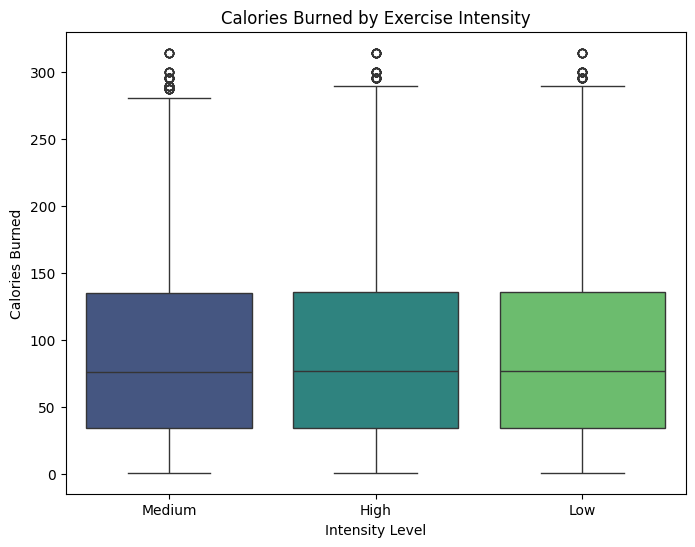

In [ ]:
# Box plot of Calories by Intensity
plt.figure(figsize=(8, 6))
sns.boxplot(x='Intensity', y='Calories', data=df, palette='viridis')
plt.title('Calories Burned by Exercise Intensity')
plt.xlabel('Intensity Level')
plt.ylabel('Calories Burned')
plt.show()

Linear Regression: Training R-squared (0.9695) is very close to the Test R-squared (0.9693). This suggests the Linear Regression model has a good fit and is not significantly overfitting or underfitting.
Lasso Regression: Training R-squared (0.9624) is the same as the Test R-squared (0.9624). This also suggests a good fit with no significant overfitting or underfitting.
Ridge Regression: Training R-squared (0.9695) is very close to the Test R-squared (0.9693). Similar to Linear Regression, this indicates a good fit.
Random Forest Regressor: Training R-squared (0.9995) is significantly higher than the Test R-squared (0.9962). This difference suggests that the Random Forest model might be slightly overfitting the training data.
Decision Tree Regressor: Training R-squared (1.0000) is perfect, while the Test R-squared (0.9928) is lower. An R-squared of 1.0 on the training data is a strong indicator of overfitting, where the model has essentially memorized the training data.

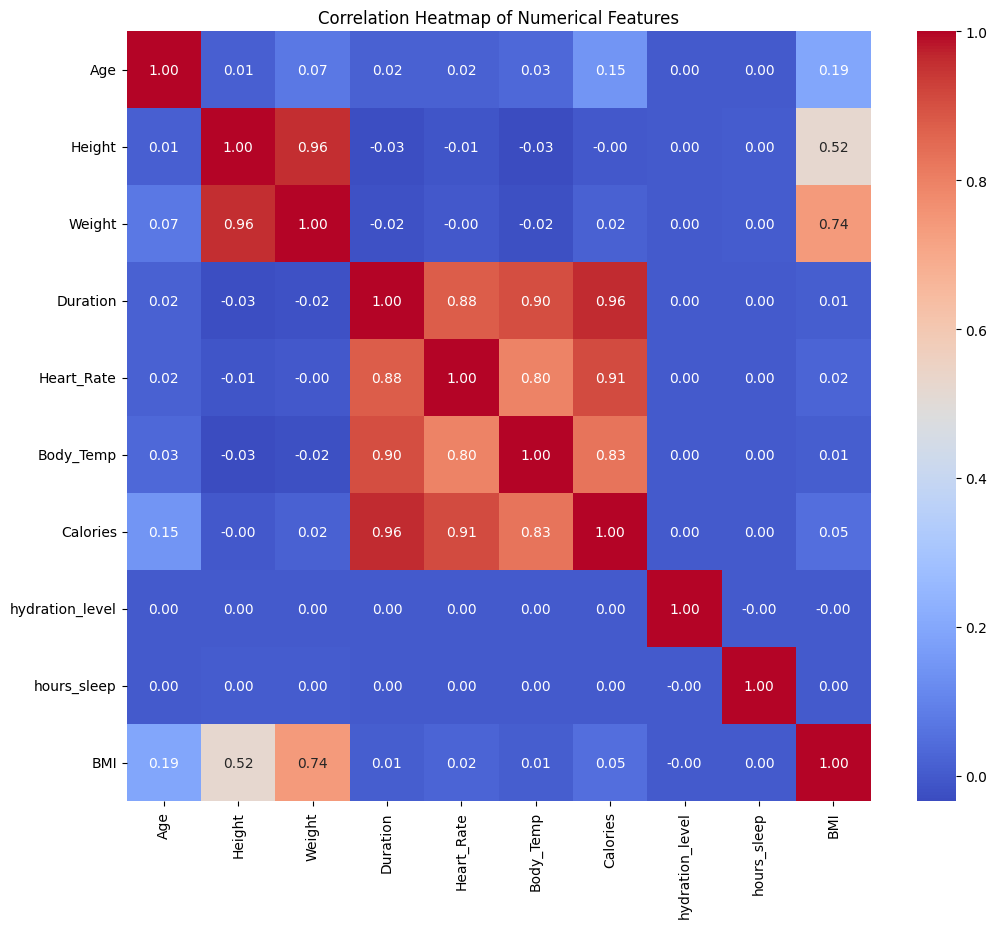

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for the heatmap
numerical_cols = df_ohe.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = df_ohe[numerical_cols].corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Strong positive correlations with Calories: 'Duration', 'Heart_Rate', and 'Body_Temp' show strong positive correlations with 'Calories'. This makes sense, as longer and more intense workouts (leading to higher heart rate and body temperature) would generally result in more calories burned.
Moderate positive correlations with Calories: 'Age' and 'BMI' have moderate positive correlations with 'Calories'.
Strong positive correlation between Height and Weight: As expected, there is a strong positive correlation between 'Height' and 'Weight'.
Strong positive correlations among Duration, Heart_Rate, and Body_Temp: These features are also highly correlated with each other, which is logical given that they are all related to the intensity and length of exercise.
Weak correlations: 'hydration_level' and 'hours_sleep' show very weak correlations with most other features, including 'Calories'.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
